#                                                    Assignment 2
# Kushal Ghimire
# C0903150

In [435]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [489]:
#load dataset
train_df = pd.read_csv(r"C:\Users\Kush\Documents\Adobe\train.csv")
test_df = pd.read_csv(r"C:\Users\Kush\Documents\Adobe\test.csv")

In [491]:
# display first 5 rows of dataset
train_df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [495]:
# display first 5 rows of dataset
test_df.head(5)

,sl_no,gender,salary
0,123,1,236000.000000
1,199,1,288655.405405
2,138,0,225000.000000
3,137,1,288655.405405
4,76,1,288655.405405


In [343]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [345]:
# Get basic statistics
train_df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [347]:
# Check for missing values
train_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [349]:
# filling salary with zero value
train_df['salary'] = train_df['salary'].fillna(0)

We are filling the Missing value of salary with zero, because zero values indicates not placement.

In [498]:
# Check for missing values
train_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [500]:
# dropping unnecessary columns
train_df.drop('sl_no', axis=1, inplace=True)

In [502]:
# Mapping status,1 for placement and 0 for not placement
train_df['status'] = train_df['status'].map({'Placed': 1, 'Not Placed': 0})
# Verify the encoding by counting the occurrences of each unique value in the 'status' column
counts = train_df['status'].value_counts()
# Display the counts of the encoded target variable
print(counts)

status
1    148
0     67
Name: count, dtype: int64


In [504]:
# data after clean ing
train_df.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


# Exploratory data analysis

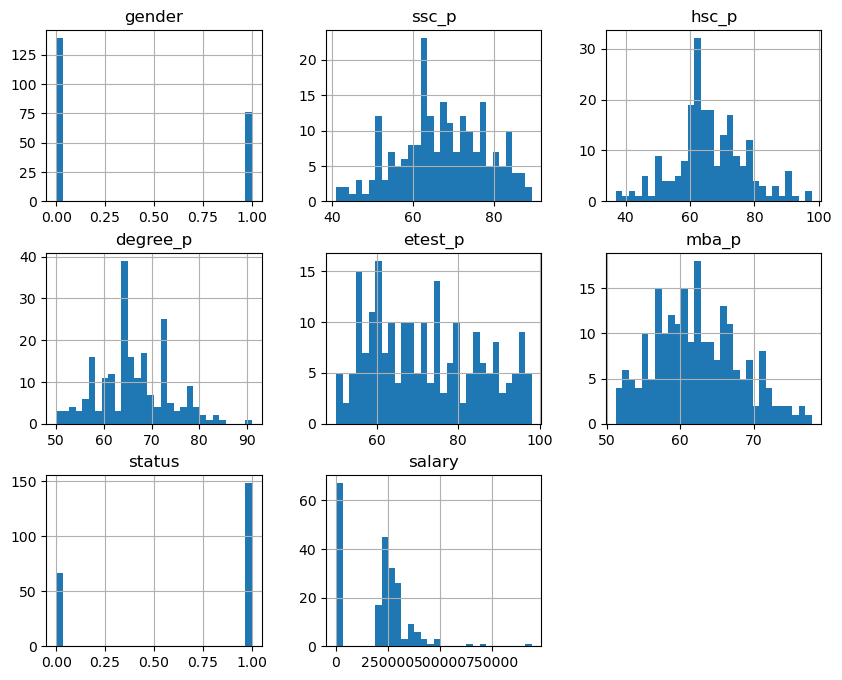

In [360]:
# Plot distribution of numerical features
train_df.hist(bins=30, figsize=(10, 8))
plt.show()

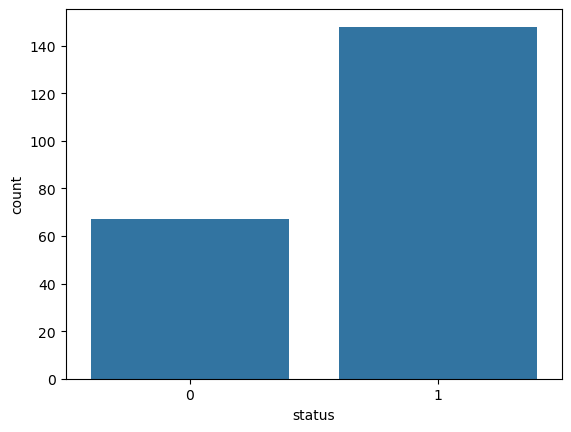

In [361]:
# Plot the target variable 'status'
sns.countplot(x='status', data=train_df)
plt.show()

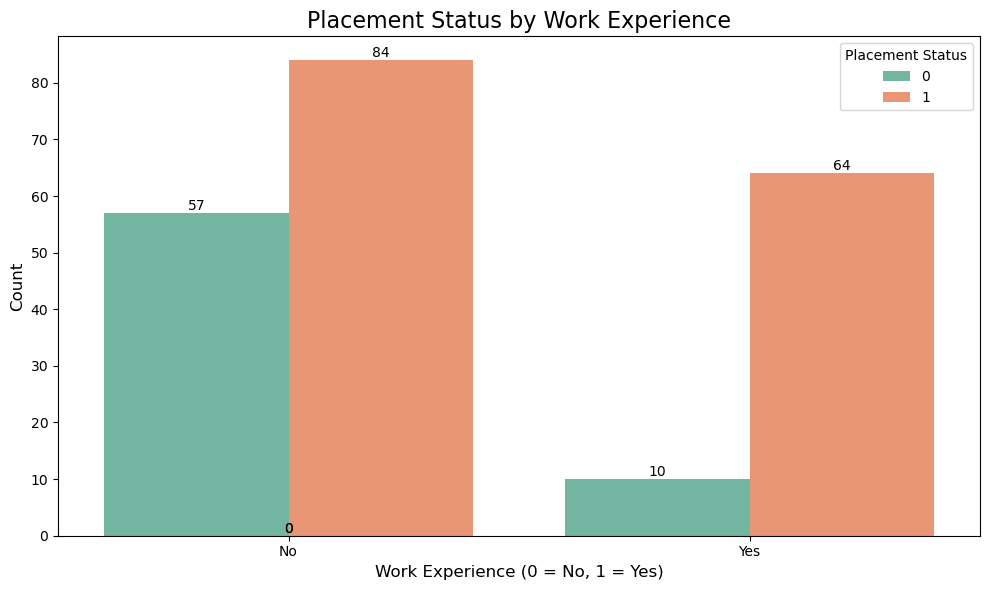

In [510]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot for work experience ('workex') with placement status ('status') as hue
count_plot = sns.countplot(data=train_df, x='workex', hue='status', palette='Set2')

# Set plot title and labels
plt.title('Placement Status by Work Experience', fontsize=16)  # Title of the plot
plt.xlabel('Work Experience (0 = No, 1 = Yes)', fontsize=12)  # X-axis label
plt.ylabel('Count', fontsize=12)  # Y-axis label

# Set legend for placement status
plt.legend(title='Placement Status', loc='upper right')

# Add data annotations on top of the bars
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

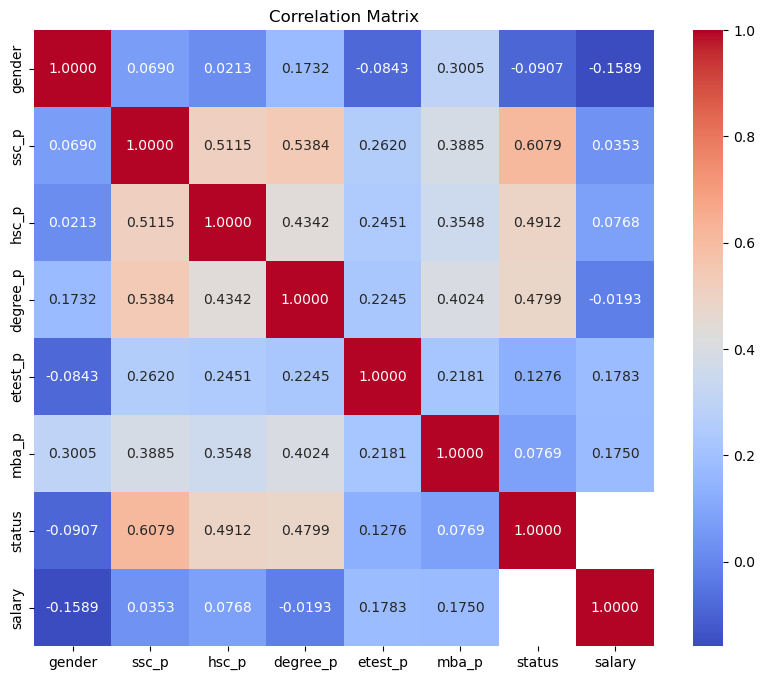

In [508]:
# numerical column
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Visualizing the correlation between numerical features
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility

# Create a heatmap to visualize the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.4f')

plt.title('Correlation Matrix')  # Title describing what the heatmap represents

# Display the heatmap
plt.show() 

# Data Preprocessing

In [335]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
 13  salary          215 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 23.6+ KB


In [389]:
# Feature-target separation
X = train_df.drop(columns=['status','salary'])  # Drop unnecessary columns
y = train_df['status']  # Target variable

In [393]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encode categorical features
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [395]:
# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [397]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['gender', 'ssc_p', 'hsc_p',
                                                   'degree_p', 'etest_p',
                                                   'mba_p']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ssc_b', 'hsc_b', 'hsc_s',
                                                   'degree_t', 'workex',
                                                   'specialisation'])]))])

In [445]:
# Function to perform GridSearchCV for a given model
def tune_model(model, param_grid):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_, grid_search.best_params_

In [447]:
# Tuning for Logistic Regression
lr_param_grid = {
    'classifier': [LogisticRegression(max_iter=1000)],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}
best_lr_model, best_lr_params = tune_model(LogisticRegression(max_iter=1000), lr_param_grid)
print("Best Logistic Regression parameters: ", best_lr_params)

Best Logistic Regression parameters:  {'classifier': LogisticRegression(max_iter=1000), 'classifier__C': 1, 'classifier__solver': 'liblinear'}


In [449]:
# Tuning for SVM
svm_param_grid = {
    'classifier': [SVC(probability=True)],  # Ensure SVC can predict probabilities
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}
best_svm_model, best_svm_params = tune_model(SVC(probability=True), svm_param_grid)
print("Best SVM parameters: ", best_svm_params)

Best SVM parameters:  {'classifier': SVC(probability=True), 'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}


In [451]:
# Tuning for Random Forest
rf_param_grid = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5]
}
best_rf_model, best_rf_params = tune_model(RandomForestClassifier(), rf_param_grid)
print("Best Random Forest parameters: ", best_rf_params)

Best Random Forest parameters:  {'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [473]:
from sklearn.metrics import precision_score, recall_score

# Evaluate the best models on the test set
models = [best_lr_model, best_svm_model, best_rf_model]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {acc:.2f}, F1-Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.82, F1-Score: 0.87, Precision: 0.83, Recall: 0.91
Confusion Matrix for Logistic Regression:
[[13  8]
 [ 4 40]]


SVM Accuracy: 0.83, F1-Score: 0.88, Precision: 0.87, Recall: 0.89
Confusion Matrix for SVM:
[[15  6]
 [ 5 39]]


Random Forest Accuracy: 0.82, F1-Score: 0.88, Precision: 0.81, Recall: 0.95
Confusion Matrix for Random Forest:
[[11 10]
 [ 2 42]]




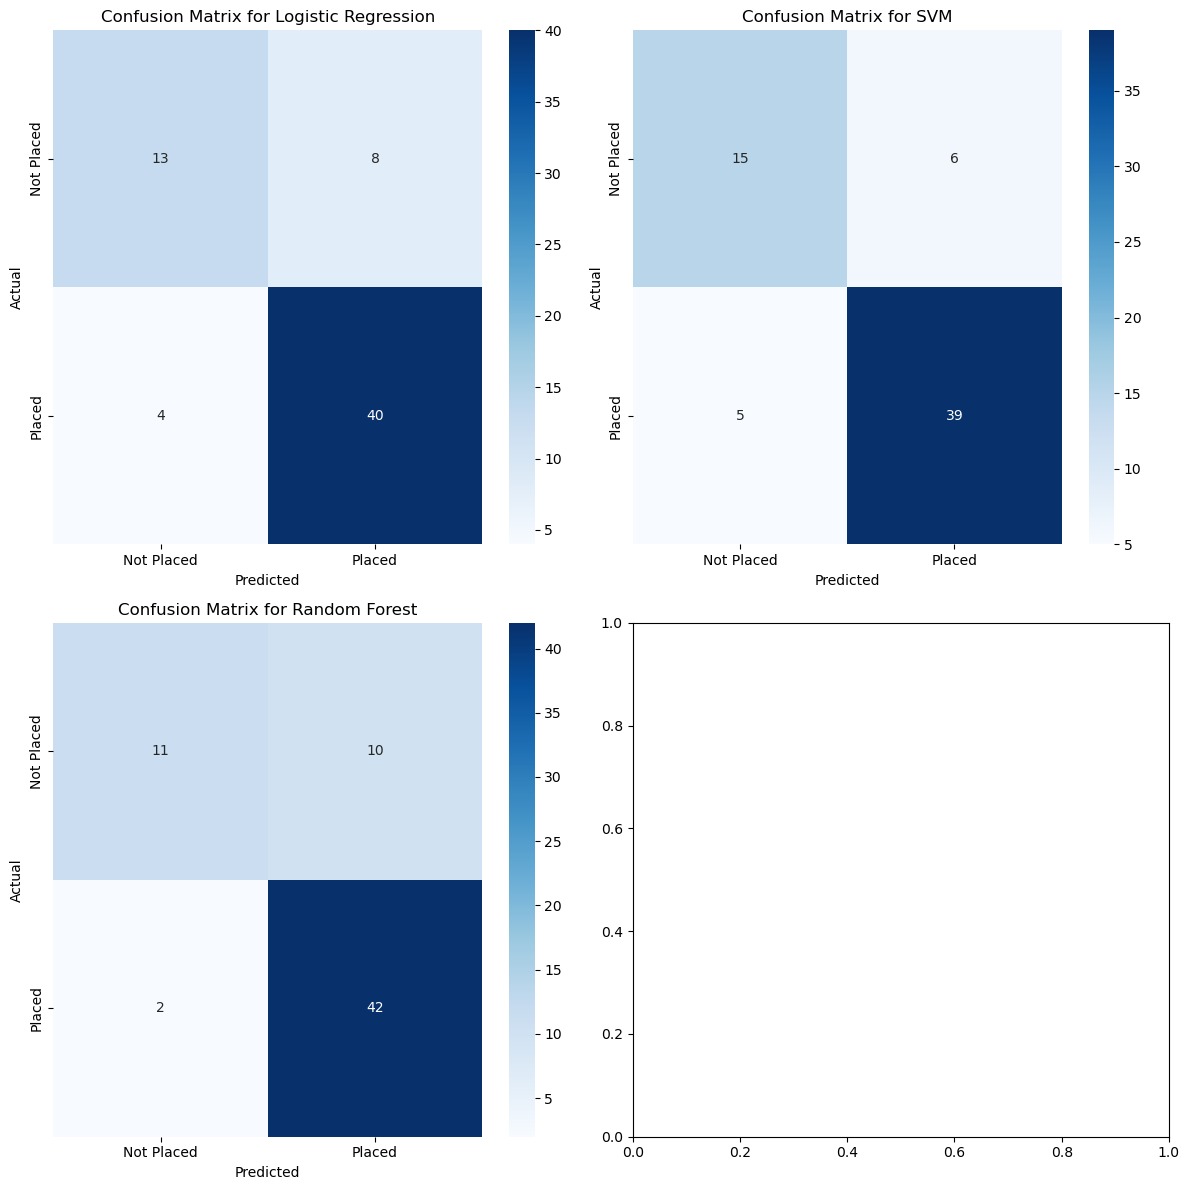

In [475]:
# Visualization of Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, model, name in zip(axes.flatten(), models, model_names):
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

In [477]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', best_lr_model),
    ('svm', best_svm_model),
    ('rf', best_rf_model)],
    voting='soft')  # Using soft voting

In [479]:
# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                StandardScaler(),
                                                                                ['gender',
                                                                                 'ssc_p',
                                                                                 'hsc_p',
                                                                                 'degree_p',
                                                                                 'etest_p',
                                                                                 'mba_p']),
                                                                               ('cat',
                                                                                OneHotEncoder(),
                                                                                ['ssc_b',
                                                                                 'hsc_b',
                                                                                 'hsc_s',
                                                                                 'degree_t',
                                                                                 'workex',
                                                                                 'specialisation'])])),
                                              ('classifier',
                                               LogisticRegression(C=1,
                                                                  max_iter=1000,
                                                                  solver='liblinear'))])),...
                                               SVC(C=10, kernel='linear',
                                                   probability=True))])),
                             ('rf',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                StandardScaler(),
                                                                                ['gender',
                                                                                 'ssc_p',
                                                                                 'hsc_p',
                                                                                 'degree_p',
                                                                                 'etest_p',
                                                                                 'mba_p']),
                                                                               ('cat',
                                                                                OneHotEncoder(),
                                                                                ['ssc_b',
                                                                                 'hsc_b',
                                                                                 'hsc_s',
                                                                                 'degree_t',
                                                                                 'workex',
                                                                                 'specialisation'])])),
                                              ('classifier',
                                               RandomForestClassifier(max_depth=10,
                                                                      n_estimators=50))]))],
                 voting='soft')

In [481]:
# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
acc_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)

print(f"Voting Classifier Accuracy: {acc_voting:.2f}, F1-Score: {f1_voting:.2f}, Precision: {precision_voting:.2f}, Recall: {recall_voting:.2f}")
print("Confusion Matrix for Voting Classifier:")
print(confusion_matrix(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.83, F1-Score: 0.88, Precision: 0.82, Recall: 0.95
Confusion Matrix for Voting Classifier:
[[12  9]
 [ 2 42]]


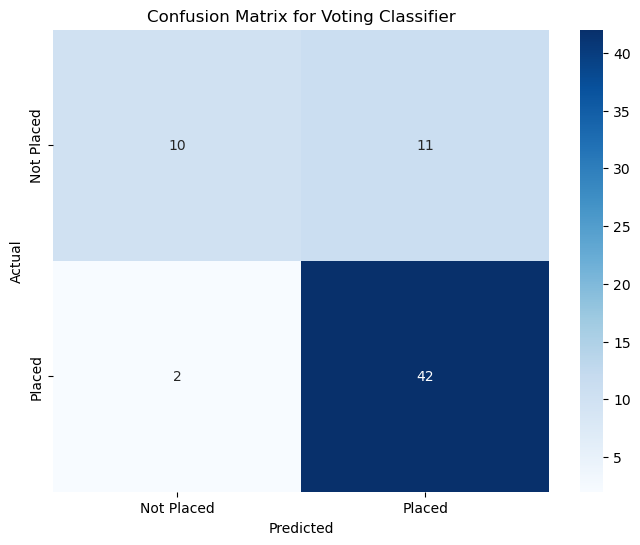

In [461]:
# Visualization of Confusion Matrix for Voting Classifier
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

In [469]:
# Compare Voting Classifier with Individual Models
models = [best_lr_model, best_svm_model, best_rf_model, voting_clf]
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Voting Classifier']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f},Precision: {precision:.2f},Recall:{recall:2f}, F1-Score: {f1:.2f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.82,Precision: 0.83,Recall:0.909091, F1-Score: 0.87
Confusion Matrix for Logistic Regression:
[[13  8]
 [ 4 40]]


SVM Accuracy: 0.83,Precision: 0.87,Recall:0.886364, F1-Score: 0.88
Confusion Matrix for SVM:
[[15  6]
 [ 5 39]]


Random Forest Accuracy: 0.82,Precision: 0.81,Recall:0.954545, F1-Score: 0.88
Confusion Matrix for Random Forest:
[[11 10]
 [ 2 42]]


Voting Classifier Accuracy: 0.80,Precision: 0.79,Recall:0.954545, F1-Score: 0.87
Confusion Matrix for Voting Classifier:
[[10 11]
 [ 2 42]]




                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.815385  0.869565   0.833333  0.909091
1                  SVM  0.830769  0.876404   0.866667  0.886364
2        Random Forest  0.815385  0.875000   0.807692  0.954545
3    Voting Classifier  0.830769  0.884211   0.823529  0.954545


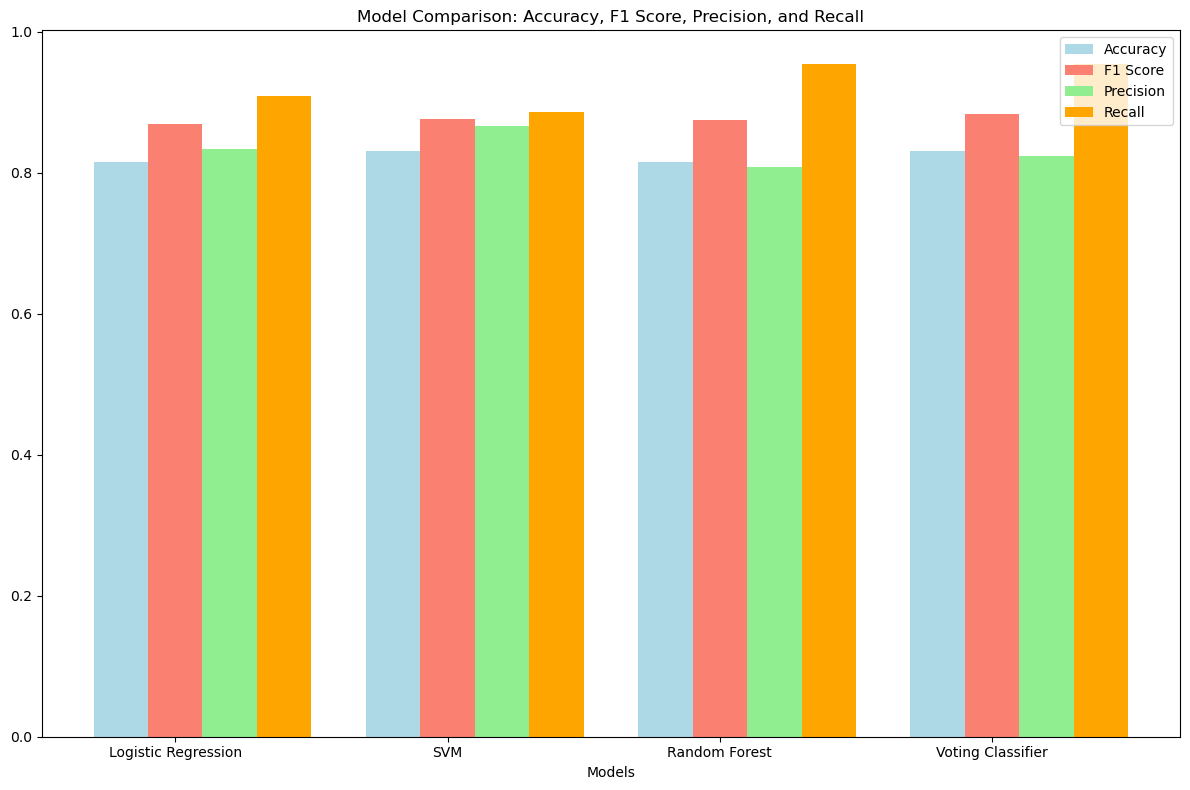

In [487]:
# Compare Voting Classifier with Individual Models and store results for visualization
model_results = []
models = [best_lr_model, best_svm_model, best_rf_model, voting_clf]
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Voting Classifier']

# Evaluate each model and collect metrics
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    model_results.append((name, acc, f1, precision, recall))

# Create DataFrame for visualization
results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Display the results DataFrame
print(results_df)

# Set the position of bars on the x-axis
x = np.arange(len(results_df))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting Accuracy
ax.bar(x - 0.2, results_df['Accuracy'], 0.2, label='Accuracy', color='lightblue')
# Plotting F1 Score
ax.bar(x, results_df['F1 Score'], 0.2, label='F1 Score', color='salmon')
# Plotting Precision
ax.bar(x + 0.2, results_df['Precision'], 0.2, label='Precision', color='lightgreen')
# Plotting Recall
ax.bar(x + 0.4, results_df['Recall'], 0.2, label='Recall', color='orange')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_title('Model Comparison: Accuracy, F1 Score, Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()